        
                                             ДИПЛОМНЫЙ ПРОЕКТ 


Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой. Файл доступен тут - https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:

1. satisfaction_level​- Уровень удовлетворенности работой
2. Last_evaluation -​ Время с момента последней оценки в годах
3. number_projects​- Количество проектов, выполненных за время работы
4. average_monthly_hours​- Среднее количество часов на рабочем месте в месяц
5. time_spend_company​- Стаж работы в компании в годах
6. work_accident​- Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left​- уволился ли сотрудник
8. promotion_last_5years​- повышался ли сотрудник за последние пять лет
9. department -​ отдел в котором работает сотрудник
10. salary​- относительный уровень зарплаты


1. [Задание 1](#s1) - ***Загрузите файл HR.csv в pandas dataframe***
2. [Задание 2](#s2) - **Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)**
3. [Задание 3](#s3) - **Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные**
4. [Задание 4](#s4) - **Рассчитайте сколько сотрудников работает в каждом департаменте**
5. [Задание 5](#s5) - **Показать распределение сотрудников по зарплатам**
6. [Задание 6](#s6) - **Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности**
7. [Задание 7](#s7) - **Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**
8. [Задание 8](#s8) - **Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):** ● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов
9. [Задание 9](#s9) - **Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки**
10. [Задание 10](#s10) - **Загрузить jupyter notebook с решение на github и прислать ссылку**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

<a id='s1'></a>
Задание 1
**`Загрузите файл HR.csv в pandas dataframe`**

In [2]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data = data.rename(columns={'satisfaction_level': 'Удовлетворенность', 'last_evaluation': 'Оценка', 'number_project': 'Проекты','average_montly_hours': 'Часы на работе', 'time_spend_company': 'Стаж', 'Work_accident': 'Несчастные случаи', 'left': 'Уволен', 'promotion_last_5years': 'Повышение', 'department': 'Отдел', 'salary': 'Зарплата' })
data.head(100)

,Удовлетворенность,Оценка,Проекты,Часы на работе,Стаж,Несчастные случаи,Уволен,Повышение,Отдел,Зарплата
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
95,0.37,0.51,2,155,3,0,1,0,sales,low
96,0.10,0.77,6,265,4,0,1,0,sales,low
97,0.10,0.84,6,279,4,0,1,0,sales,low
98,0.11,0.97,6,284,4,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Удовлетворенность  14999 non-null  float64
 1   Оценка             14999 non-null  float64
 2   Проекты            14999 non-null  int64  
 3   Часы на работе     14999 non-null  int64  
 4   Стаж               14999 non-null  int64  
 5   Несчастные случаи  14999 non-null  int64  
 6   Уволен             14999 non-null  int64  
 7   Повышение          14999 non-null  int64  
 8   Отдел              14999 non-null  object 
 9   Зарплата           14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<a id='s2'></a>
Задание 2 
**`Рассчитайте основные статистики для переменных 10 (среднее,медиана,мода,мин/макс,сред.отклонение)`**

In [5]:
stats = data.describe() 
stats

,Удовлетворенность,Оценка,Проекты,Часы на работе,Стаж,Несчастные случаи,Уволен,Повышение
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
stats = stats.drop(index=['count', '25%', '75%'])
stats #среднее, сред.отклонение, мин, медиана, макс

,Удовлетворенность,Оценка,Проекты,Часы на работе,Стаж,Несчастные случаи,Уволен,Повышение
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.mode(0) #мода

,Удовлетворенность,Оценка,Проекты,Часы на работе,Стаж,Несчастные случаи,Уволен,Повышение,Отдел,Зарплата
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


<a id='s3'></a>
Задание 3 
**`Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные`**

In [8]:
data.corr()

,Удовлетворенность,Оценка,Проекты,Часы на работе,Стаж,Несчастные случаи,Уволен,Повышение
Удовлетворенность,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
Оценка,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
Проекты,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
Часы на работе,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
Стаж,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Несчастные случаи,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
Уволен,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
Повышение,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

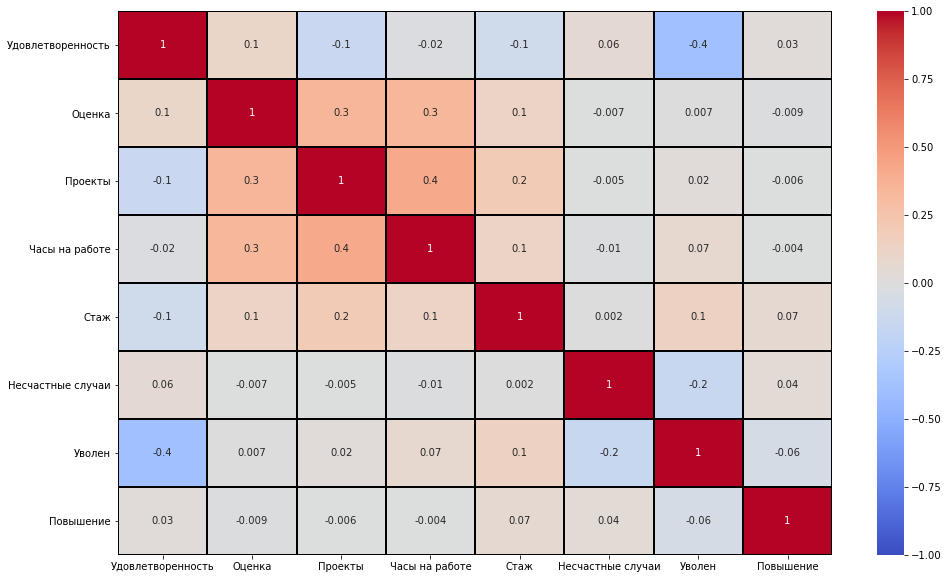

In [9]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')


In [10]:
# самые скоррелированные - Часы на работе и Проекты
# наименее скоррелированные - Удовлетворенность и Уволен

<a id='s4'></a>
Задание 4 
**` Рассчитайте сколько сотрудников работает в каждом отделе`**

In [11]:
rab = data['Отдел'].value_counts(normalize=False).reset_index() #Количество сотрудников в отделах

In [12]:
rab.columns = ['Отдел', 'Количество работающих']
rab

,Отдел,Количество работающих
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


<a id='s5'></a>
Задание 5 
**` Показать распределение сотрудников по зарплатам`**

<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество'>

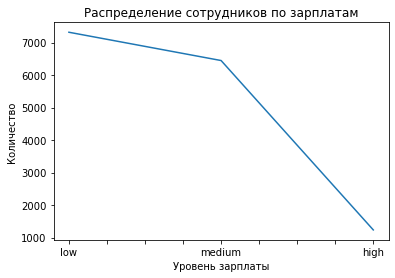

In [13]:
data['Зарплата'].value_counts().plot(title='Распределение сотрудников по зарплатам',
                                        xlabel='Уровень зарплаты', 
                                        ylabel='Количество')

<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество'>

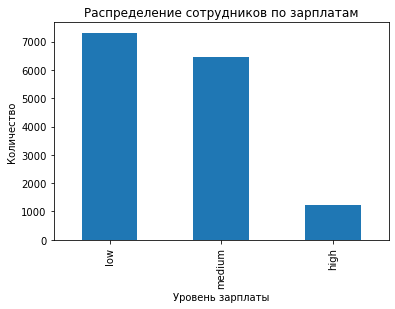

In [14]:
data['Зарплата'].value_counts().plot(kind='bar', 
                                                                  title='Распределение сотрудников по зарплатам',
                                                                  xlabel='Уровень зарплаты',
                                                                  ylabel='Количество')

<a id='s6'></a>
Задание 6 
**`Показать распределение сотрудников по зарплатам в каждом отделе по отдельности`**

<AxesSubplot:xlabel='Отдел', ylabel='count'>

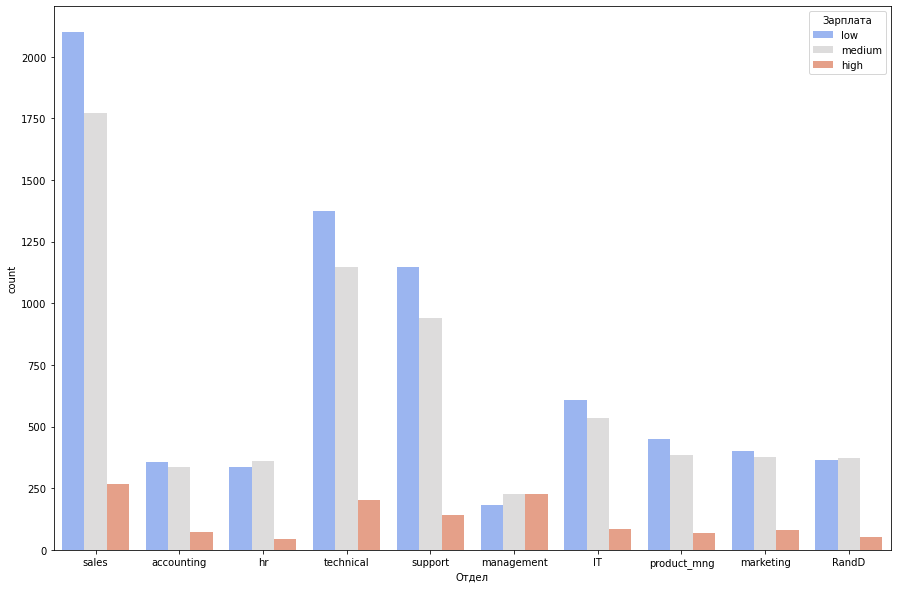

In [15]:
plt.rcParams['figure.figsize']=(15,10)
sns.countplot(data = data.loc[data['Зарплата']!="NO"], x = 'Отдел', hue = 'Зарплата', palette="coolwarm")

<a id='s7'></a>
Задание 7 
**`Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом`**

In [16]:
# Принимаем нулевую гипотезу H0 о том, что что сотрудники с высоким окладом проводят на работе столько же времени, что и сотрудники с низким окладом
# И альтернативная гипотеза H1 что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [17]:
alpha = 0.05

data_T = data[data['Зарплата'].isin(['low','high'])]
data_T.set_index('Зарплата', inplace = True)
t_stat, t_pval = ttest_ind(data_T.loc['low','Часы на работе'], 
                           data_T.loc['high','Часы на работе'], alternative = 'less', equal_var = False)
result = ttest_ind(data_T.loc['low','Часы на работе'], 
                           data_T.loc['high','Часы на работе'], alternative = 'less', equal_var = False)
#print(t_stat)
#print(t_pval)
print(result)


if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.7770477228871056)
Не отвергаем нулевую гипотезу


<a id='s8'></a>
Задание 8 
**`Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):** ● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов`**

In [18]:
data[['Повышение', 'Удовлетворенность', 'Проекты', 'Уволен']].groupby('Уволен').mean()

,Повышение,Удовлетворенность,Проекты
Уволен,,,
0,0.026251,0.666810,3.786664
1,0.005321,0.440098,3.855503


<a id='s9'></a>
Задание 9 
**`Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки`**

In [21]:
X = data[['Удовлетворенность', 'Оценка', 'Проекты', 'Часы на работе', 
        'Стаж', 'Несчастные случаи', 'Повышение']]
Y = data['Уволен']

In [22]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [23]:
lda = LinearDiscriminantAnalysis()

In [24]:
#Обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [25]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0])

In [26]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,Уволен,Unnamed 0
3518,0.0,0.0
6112,0.0,NaN
13866,0.0,NaN
2617,0.0,0.0
11403,0.0,NaN
...,...,...
3340,0.0,0.0
4068,0.0,0.0
1151,1.0,0.0
14543,1.0,NaN


In [27]:
# расчет точности 

accuracy_score(y_test, lda.predict(X_test))

0.7588888888888888